[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# YOLOv8 Nesne Tespitini Özel Bir Veri Kümesinde Nasıl Eğitirsiniz

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8, Ultralytics tarafından geliştirilen YOLO (You Only Look Once) nesne tespiti ve görüntü segmentasyonu modelinin en son sürümüdür. YOLOv8 modeli, hızlı, doğru ve kullanımı kolay olacak şekilde tasarlanmıştır ve geniş bir yelpazede nesne tespiti ve görüntü segmentasyonu görevleri için mükemmel bir seçimdir. Büyük veri kümeleri üzerinde eğitilebilir ve CPU'lardan GPU'lara kadar çeşitli donanım platformlarında çalıştırılabilir.



## ⚠️ Uyarı

YOLOv8 halen yoğun bir şekilde geliştirilmektedir. Neredeyse her hafta köklü değişiklikler yapılmaktadır. YOLOv8 not defterlerimizin en son sürümle çalışmasını sağlamaya çalışıyoruz. Son testler 03.01.2024 tarihinde, YOLOv8.0.196 sürümü ile yapılmıştır.

Eğer not defterimizin hatalı davrandığını fark ederseniz, özellikle de eğitim sırasında ilerlemenizi engelleyen hatalar yaşıyorsanız, lütfen bize bildirin ve Roboflow Notebooks deposunda bir sorun açın. [issue](https://github.com/roboflow/notebooks/issues).

## Eşlik Eden Blog Yazısı


YOLOv8 Nesne Tespiti nasıl eğitileceğiyle ilgili blog yazısını okurken, bu not defterini paralel olarak takip etmenizi öneririz.
## Pro İpucu: GPU Hızlandırmayı Kullanın


Eğer bu not defterini Google Colab'de çalıştırıyorsanız, Düzenle -> Not Defteri Ayarları -> Donanım hızlandırıcıya gidin, GPUyu seçin ve ardından Kaydete tıklayın. Bu, not defterinizin GPU kullanmasını sağlayacak ve model eğitme sürelerini önemli ölçüde hızlandıracaktır.

## Bu Eğitimdeki Adımlar

Bu eğitimde şunları ele alacağız:

- Başlamadan önce
- YOLOv8'i yükleyin
- CLI Temelleri
- Önceden Eğitilmiş COCO Modeli ile Çıkarım
- Roboflow Universe
- Özel bir veri kümesi hazırlama
- Özel Eğitim
- Özel Modeli Doğrulama
- Özel Model ile Çıkarım








**Let's begin!**

## Başlamadan Önce

Gpu erişimimiz olduğunu kontrol edelim. `nvidia-smi` komutunu çalıştırarak bunu görebiliriz.

In [1]:
!nvidia-smi

Mon Dec 15 19:19:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

 YOLOv8 halen yoğun bir şekilde geliştirilmektedir. Neredeyse her hafta büyük değişiklikler yapılmaktadır. YOLOv8 not defterlerimizin en son sürümle çalışmasını sağlamaya çalışıyoruz. Son testler 03.01.2024 tarihinde, YOLOv8.0.196 sürümü ile yapılmıştır.

Eğer not defterimizin hatalı davrandığını fark ederseniz, özellikle de eğitim sırasında ilerlemenizi engelleyen hatalar yaşıyorsanız, lütfen bize bildirin ve Roboflow Notebooks deposunda bir [issue](https://github.com/roboflow/notebooks/issues) açın.

YOLOv8 iki şekilde kurulabilir: kaynak koddan ve pip ile. Bu, YOLOv8'in en yeni sürümü olduğu için bu seçenekler sunulmaktadır.

In [3]:
# Gerekli kütüphaneleri kur ve güncelle
!pip install -U ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Temelleri

Eğer modelleri eğitmek, doğrulamak veya çıkarım yapmak istiyorsanız ve koda herhangi bir değişiklik yapmanız gerekmiyorsa, YOLO komut satırı arayüzünü (CLI) kullanmak, başlamak için en kolay yoldur. CLI hakkında daha fazla bilgi edinmek için...
[Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Önceden Eğitilmiş COCO Modelini Kullanmak.








### 💻 CLI

`yolo mode=predict` en son YOLOv8 sürümünden modelleri otomatik olarak indirir ve sonuçları `runs/predict` dizinine kaydeder. .

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 74.7ms
Speed: 10.0ms preprocess, 74.7ms inference, 41.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


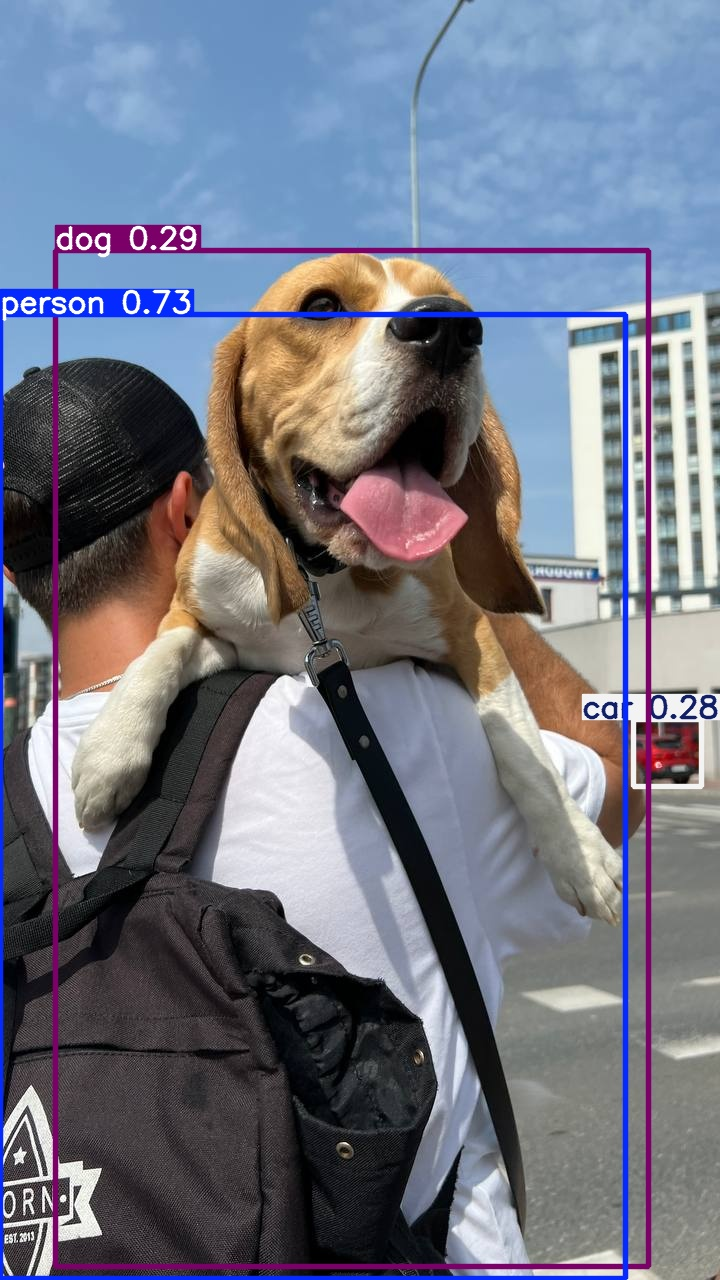

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpg', height=600)

### 🐍 Python SDK

Python ile yolo kullanımı.


In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 48.6ms
Speed: 1.7ms preprocess, 48.6ms inference, 16.7ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4716,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Dataset Hazırlamak

Özel bir veri kümesi oluşturmak zor bir süreç olabilir. Görüntüleri toplamak, etiketlemek ve bunları uygun formatta dışa aktarmak için onlarca veya hatta yüzlerce saat harcamanız gerekebilir. Neyse ki, Roboflow bu süreci mümkün olduğunca basit ve hızlı hale getirir. Size nasıl yapıldığını göstereyim!


### Step 1: Creating project

Öncelikle bir hesap oluşturmamız gerekiyor. [account](https://app.roboflow.com/login). Hesap oluşturduktan sonra roboflowda yeni bir proje oluşturabiliriz [dashboard](https://app.roboflow.com/). Proje türünü doğru seçmeyi unutmayın. Bu notebooktaki örnek için "object detection" seçmelisiniz.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Sonra, verileri yeni oluşturduğunuz projeye ekleyin. Bunu API üzerinden veya...
 [web interface](https://docs.roboflow.com/adding-data/object-detection) üzerinden gerçekleştirebilirsiniz.

Desteklenen bir formatta bir veri kümesi içeren bir dizini sürükleyip bıraktığınızda, Roboflow kontrol paneli otomatik olarak görüntüleri ve açıklamaları bir arada okuyacaktır.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

Eğer yalnızca görüntüleriniz varsa, bunları Roboflow üzerinde etiketleyebilirsiniz.
[Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Artık görüntülerimizi ve açıklamalarımızı eklediğimize göre, bir Veri Kümesi Versiyonu oluşturabiliriz. Bir Versiyon Oluştururken, ön işleme ve artırmalar eklemeyi seçebilirsiniz. Bu adım tamamen isteğe bağlıdır; ancak modelinizin dayanıklılığını önemli ölçüde artırmanıza olanak tanıyabilir.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Veri kümesi versiyonu oluşturulduğunda, kolay eğitim için not defterimize doğrudan yükleyebileceğimiz bir barındırılan veri kümesine sahip oluruz. `Export` seçeneğine tıklayarak ve `YOLO8` dataset formatını seçerek datasetini indirebiliriz.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="jVMs7pIXHkpFNsw1CNRm")
project = rf.workspace("muhammet-bilal-erko").project("rock-paper-scissors-sxsw-oey18")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-1 in yolov8:: 100%|██████████| 6270/6270 [00:00<00:00, 9974.23it/s] 


## Custom Training

In [13]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.8
    Uninstalling albumentations-2.0.8:
      Successfully uninstalled albumentations-2.0.8


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/rock-paper-scissors-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

In [15]:
!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2070.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch2071.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch2072.jpg  weights
labels.jpg			 train_batch2.jpg


/content


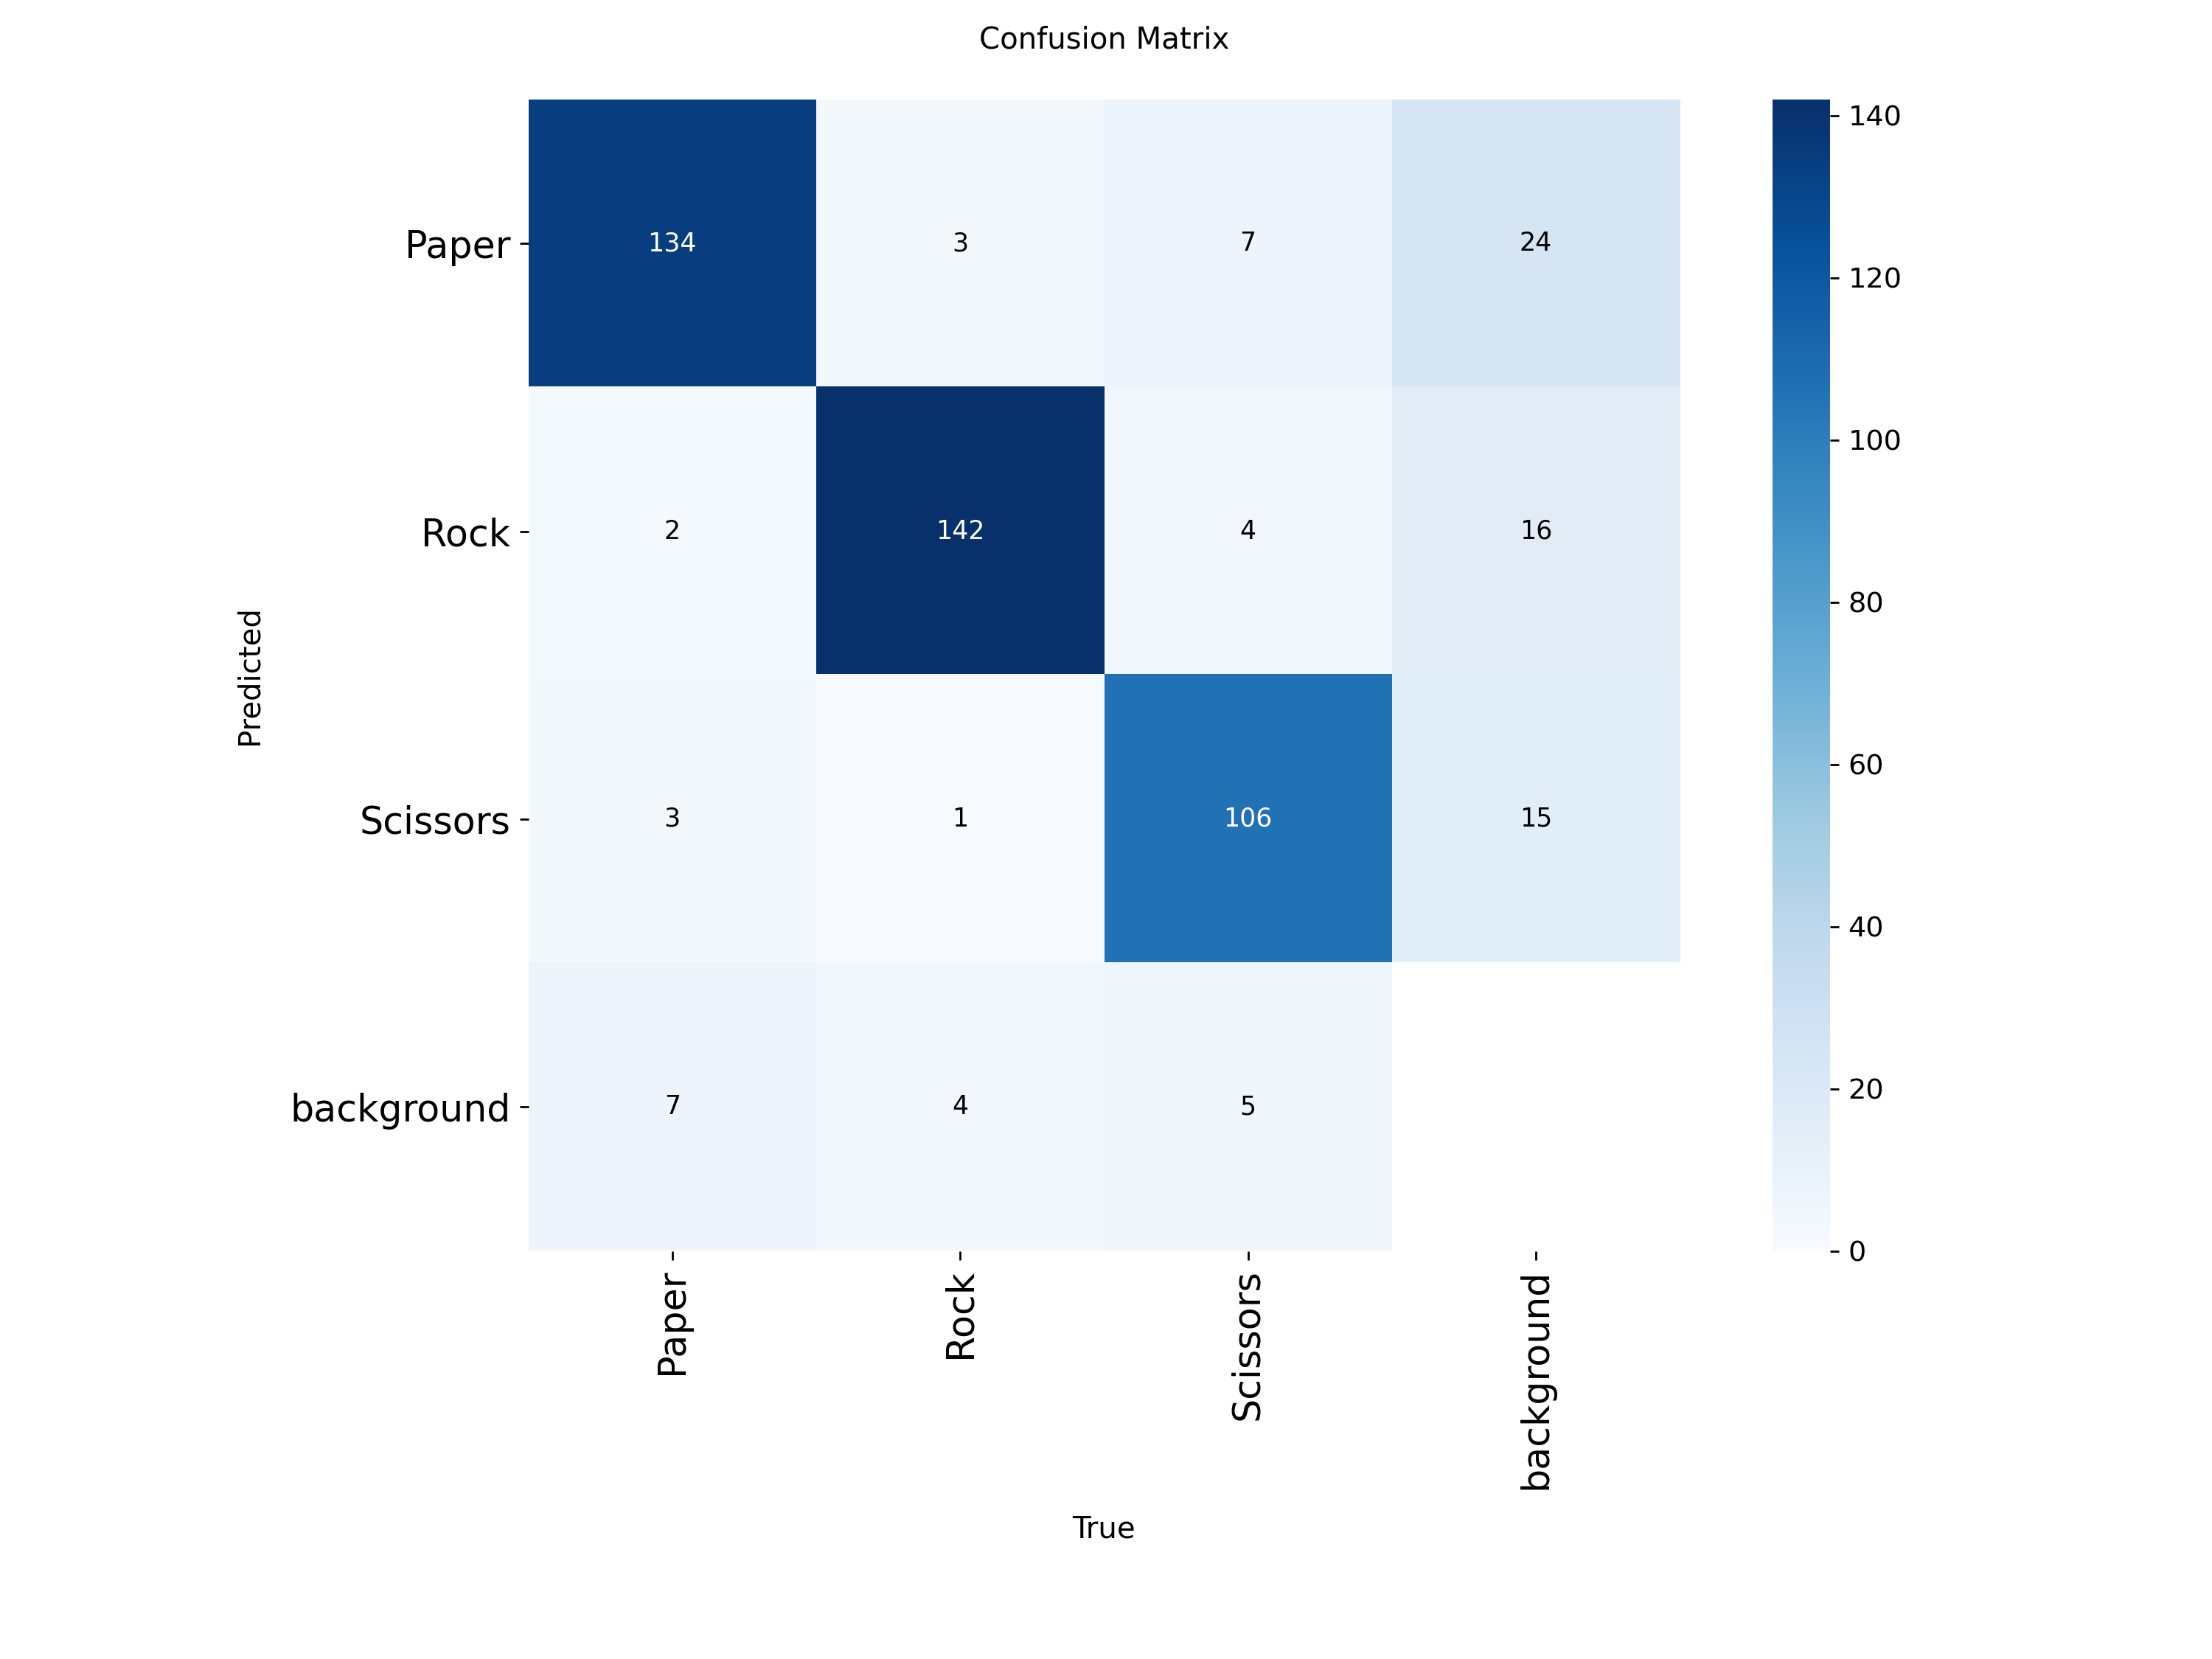

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


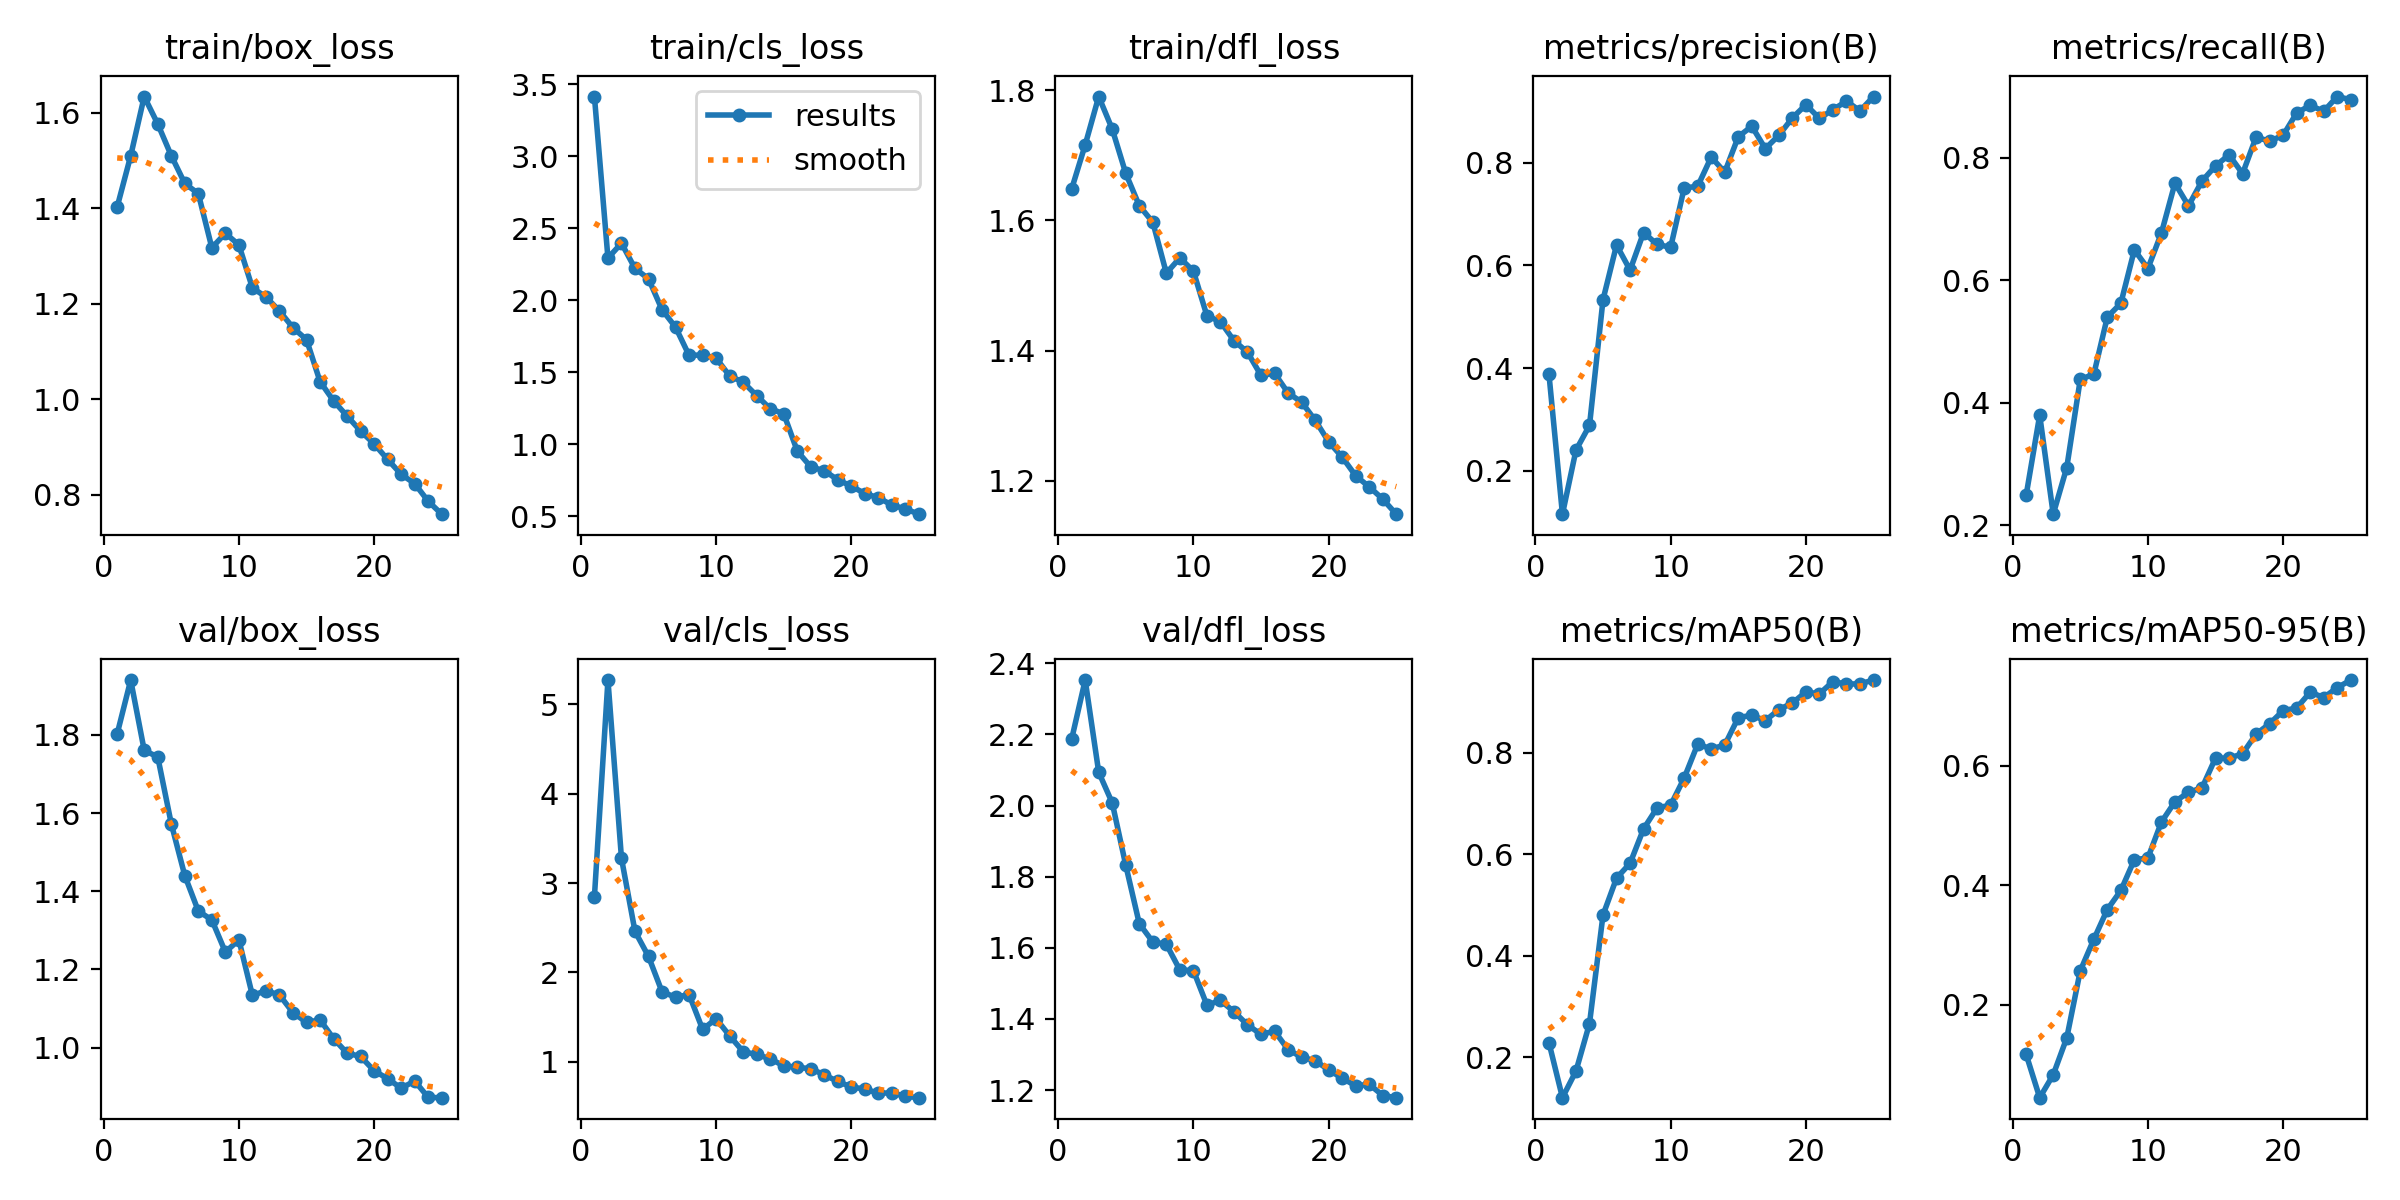

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


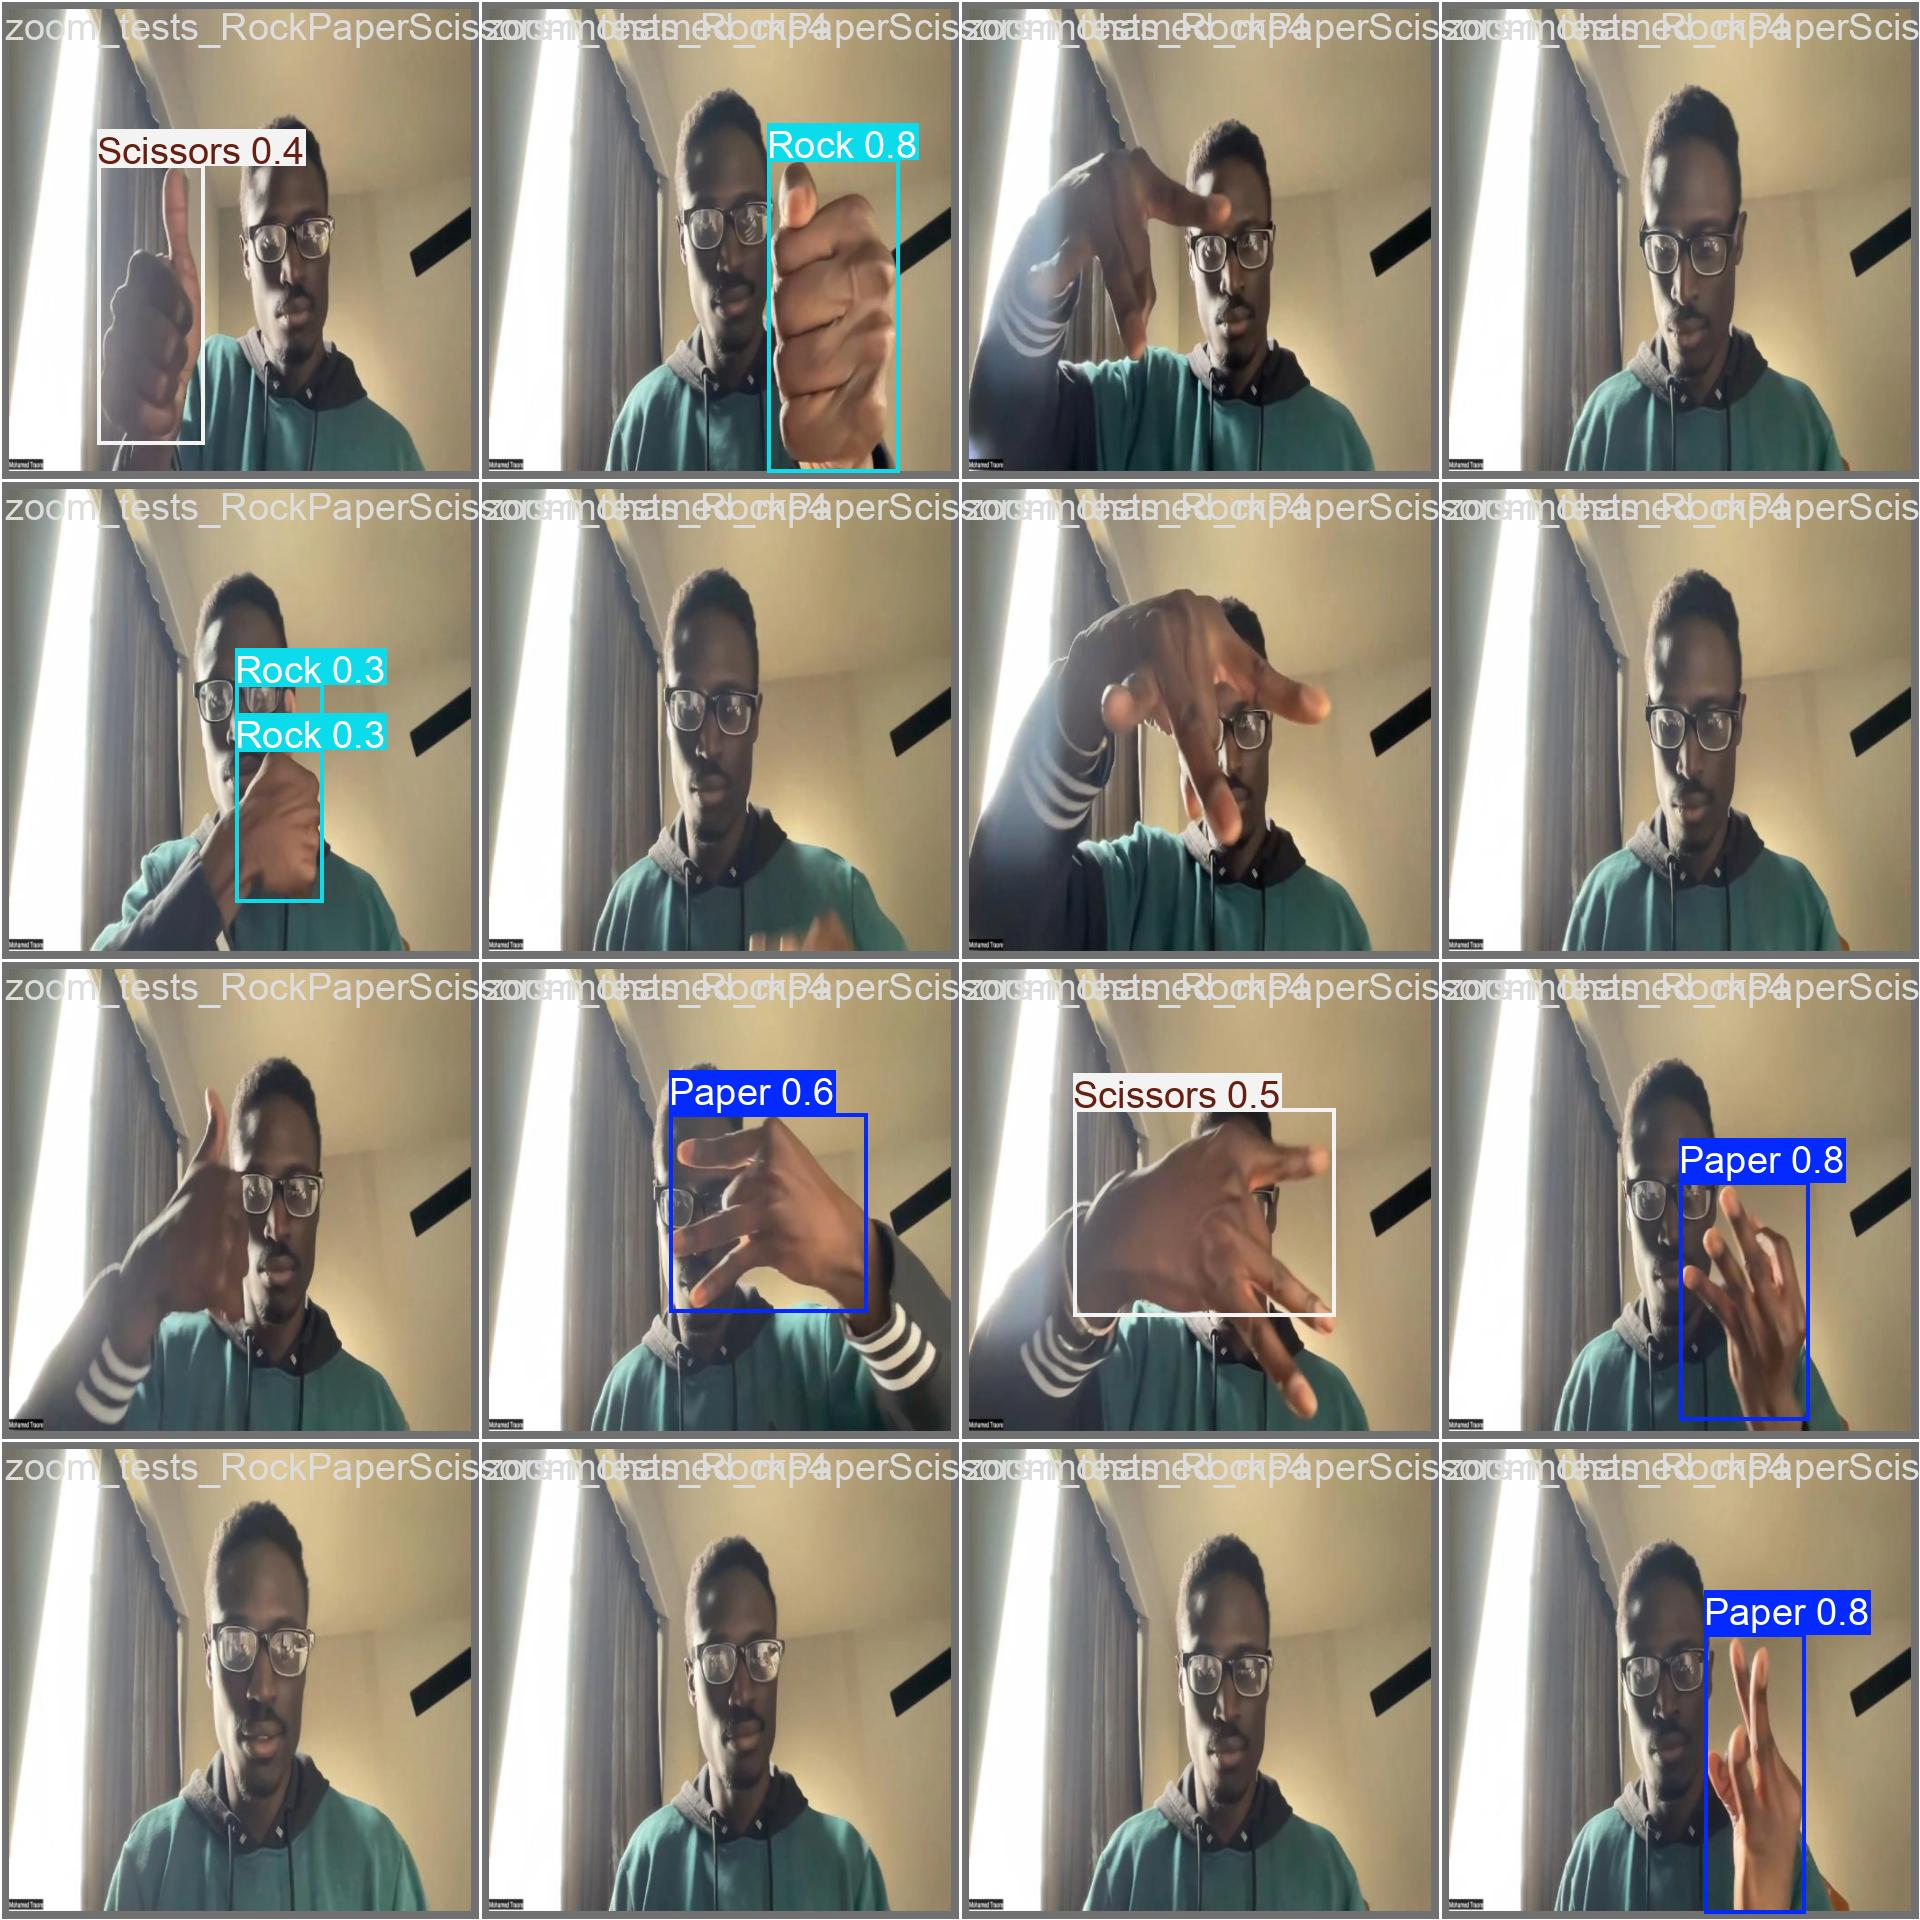

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1245.4±265.2 MB/s, size: 25.0 KB)
val: Scanning /content/datasets/rock-paper-scissors-1/valid/labels.cache... 604 images, 251 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 604/604 10.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 38/38 3.1it/s 12.2s
                   all        604        418      0.929      0.895      0.944      0.743
                 Paper        139        146      0.916      0.904      0.944      0.743
                  Rock        128        150      0.909      0.936      0.955      0.728
              Scissors        118        122      0.961      0.844      0.933      0.759
Speed: 2.8ms preprocess, 13.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /

## Inference with Custom Model

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.238 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/329 /content/datasets/rock-paper-scissors-1/test/images/10e0gvm_jpg.rf.fc9a717b8db5c07947f73bae774966fd.jpg: 800x800 (no detections), 22.4ms
image 2/329 /content/datasets/rock-paper-scissors-1/test/images/15208484cellblock_jpg.rf.c05f3682f0eb3bb19072c88d1041b377.jpg: 800x800 (no detections), 22.3ms
image 3/329 /content/datasets/rock-paper-scissors-1/test/images/19171_298_298_1_0_jpg.rf.c486801eaf1805cb10be90793aa2a345.jpg: 800x800 (no detections), 22.3ms
image 4/329 /content/datasets/rock-paper-scissors-1/test/images/20061004021831_jpg.rf.7c83dc24795ea182838d372eb7428cf8.jpg: 800x800 (no detections), 22.3ms
image 5/329 /content/datasets/rock-paper-scissors-1/test/images/20220216_221550_jpg.rf.54174e159364fe4f6b03094c18f90010.jpg: 800x800 1 Scissors, 22.3ms
image 6/329 /content/datasets/rock-paper-scissors-

**NOTE:** Bir kaç örneğe bakalım.

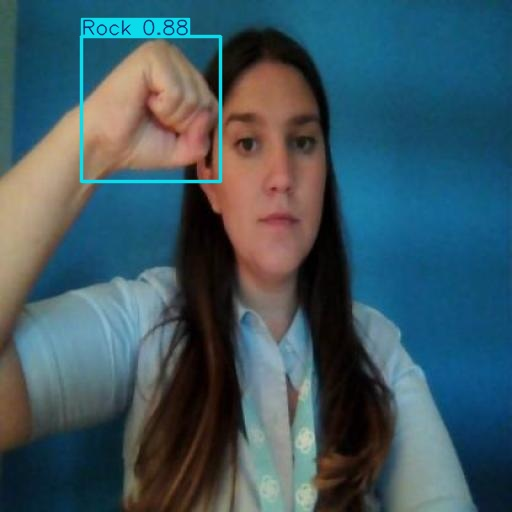

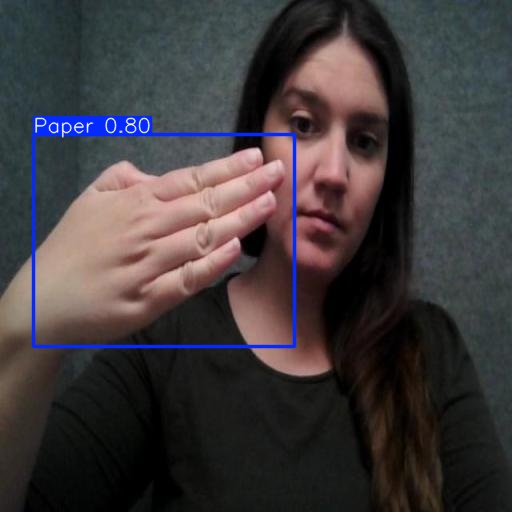

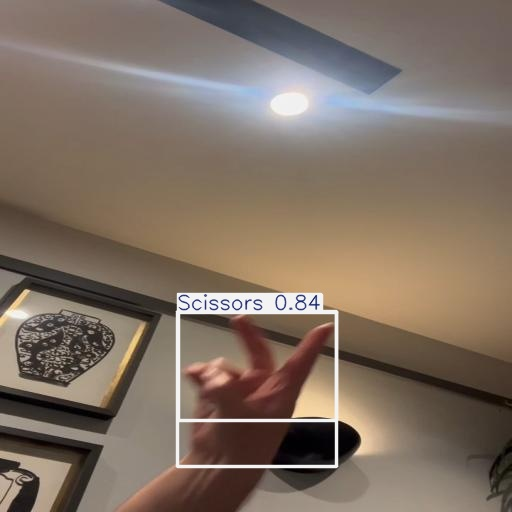

In [21]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")